# Load the dataframe

In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
# "./data_small/TG_STAID000001.txt" is the path to the CSV file
# skiprows=20 skips the first 20 rows of the CSV file, useful if there are header lines or metadata at the beginning
# parse_dates=["    DATE"] parses the "DATE" column as dates, assuming it's in a specific format
df = pd.read_csv("../static/data_small/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


# Show certain rows

In [3]:
# Select rows from index 10 to index 19 (inclusive)
# Note: DataFrame indexing is zero-based, so the index 10 corresponds to the 11th row,
# and the index 19 corresponds to the 20th row.
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


# Show certain columns

In [4]:
# Get the column names of the DataFrame
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [5]:
# Accessing a column by its name.
# Note: Column name must be exact.
df['   TG']

# The output is a Series because accessing a single column from a DataFrame
# returns a pandas Series object.

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

In [6]:
# Selecting multiple columns by passing their names in a list
# The output is a DataFrame because multiple columns are selected
df[['    DATE', '   TG']]

,DATE,TG
0,1860-01-01,21
1,1860-01-02,46
2,1860-01-03,31
3,1860-01-04,37
4,1860-01-05,31
...,...,...
59316,2022-05-27,-9999
59317,2022-05-28,-9999
59318,2022-05-29,-9999
59319,2022-05-30,-9999


# Simple statistics and filtering

In [7]:
# Filter out rows where the '   TG' column is not equal to -9999 using Boolean Indexing with .loc
# The condition df['   TG'] != -9999 checks each value in the '   TG' column to see if it's not equal to -9999
# df['   TG'].loc[df['   TG'] != -9999] selects only the temperature values that are not equal to -9999 
# in the '   TG' column
# This filtering removes invalid or missing temperature values represented by -9999 in the '   TG' column,
# making the data more reliable
valid_TG_temperatures = df['   TG'].loc[df['   TG'] != -9999]

# Calculate the mean (average) temperature in degrees Celsius
# The '   TG' column contains temperature values in tenths of a degree Celsius 
# (as indicated by "Mean temperature in 0.1 °C" in the .txt file)
# Divide by 10 to convert from tenths of a degree Celsius to degrees Celsius
# This conversion makes the temperature values more interpretable and compatible with typical measurements
mean_TG_temperature_celsius = valid_TG_temperatures.mean() / 10

# Display the mean temperature in degrees Celsius
mean_TG_temperature_celsius

6.360787526128467

In [8]:
# Calculate the maximum temperature in degrees Celsius
# valid_TG_temperatures.max() returns the maximum temperature value in tenths of a degree Celsius
# Divide by 10 to convert from tenths of a degree Celsius to degrees Celsius
max_TG_temperature_celsius = valid_TG_temperatures.max() / 10

# Display the max temperature in degrees Celsius
max_TG_temperature_celsius

26.2

In [9]:
# Calculate the minimum temperature in degrees Celsius
# valid_TG_temperatures.min() returns the minimum temperature value in tenths of a degree Celsius
# Divide by 10 to convert from tenths of a degree Celsius to degrees Celsius
min_TG_temperature_celsius = valid_TG_temperatures.min() / 10

# Display the min temperature in degrees Celsius
min_TG_temperature_celsius

-28.8

<Axes: >

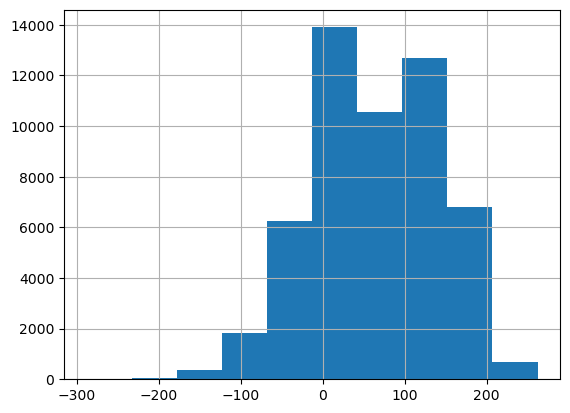

In [10]:
# Display a histogram of the valid temperature values
# valid_TG_temperatures.hist() generates a histogram plot of the temperature values in valid_TG_temperatures
# This visualization helps in understanding the distribution of temperature data and identifying patterns
valid_TG_temperatures.hist()

# Get certain cells

In [11]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


In [12]:
# get the cell wher data is 31

# Get the temperature value for a specific date
# df['    DATE'] == '1860-01-05' creates a boolean mask to filter rows where the date is '1860-01-05'
# df['   TG'].loc[df['    DATE'] == '1860-01-05'] selects the 'TG' temperature values for rows 
# where the date is '1860-01-05'
# .squeeze() is used to convert the resulting Series to a scalar value, assuming there's only one matching row
# Divide by 10 to convert from tenths of a degree Celsius to degrees Celsius

# Select the temperature value for the specific date as a Series
temperature_1860_01_05 = df['   TG'].loc[df['    DATE'] == '1860-01-05']

# Convert the Series to a scalar value and divide by 10 to get the actual temperature in degrees Celsius
temperature_1860_01_05_actual_value = temperature_1860_01_05.squeeze() / 10

# Display the temperature value for the specified date in degrees Celsius
temperature_1860_01_05_actual_value

3.1

In [13]:
# The date when the temperature was the highest
# Get the date corresponding to the maximum temperature value in the '   TG' column
# df['   TG'].max() calculates the maximum temperature value in the '   TG' column
# df['   TG'] == df['   TG'].max() creates a boolean mask to filter rows where the temperature value equals the maximum temperature value
# df['    DATE'].loc[df['   TG'] == df['   TG'].max()] selects the corresponding dates from the '    DATE' column based on the boolean mask
date_max_temperature = df['    DATE'].loc[df['   TG'] == df['   TG'].max()]

# Display the date(s) value corresponding to the maximum temperature value
date_max_temperature.squeeze()

Timestamp('1868-08-16 00:00:00')

In [14]:
# Access the value in the '   TG' column of the DataFrame df at row index 3
# df.loc[3, '   TG'] selects the value in the '   TG' column at row index 3
value_at_index_3 = df.loc[3, '   TG']

# Display the selected value
value_at_index_3

37

# Calculate a new column out of an existing column

In [15]:
# Import the numpy library as np for numerical operations
import numpy as np

# Create a new column 'TG_valid' in the DataFrame df
# df['   TG'] is the original 'TG' column containing temperature values
# .mask(df['   TG']==-9999, np.nan) replaces values in the 'TG' column that are equal to -9999 with NaN (Not a Number)
# NaN represents missing or invalid data in pandas
# The resulting 'TG_valid' column will have NaN values where the original 'TG' column had -9999
df['TG_valid'] = df['   TG'].mask(df['   TG']==-9999, np.nan)

# display the dataframe wth the new added column
df

,STAID,SOUID,DATE,TG,Q_TG,TG_valid
0,1,35381,1860-01-01,21,0,21.0
1,1,35381,1860-01-02,46,0,46.0
2,1,35381,1860-01-03,31,0,31.0
3,1,35381,1860-01-04,37,0,37.0
4,1,35381,1860-01-05,31,0,31.0
...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN
59317,1,35381,2022-05-28,-9999,9,NaN
59318,1,35381,2022-05-29,-9999,9,NaN
59319,1,35381,2022-05-30,-9999,9,NaN


In [16]:
# Create a new column 'TG_Celsius' containing temperature values converted from tenths of a degree Celsius to degrees Celsius
# df['   TG'] / 10 divides the temperature values in tenths of a degree Celsius by 10 to convert them to degrees Celsius
df['TG_Celsius'] = df['TG_valid'] / 10

# Create a new column 'TG_Fahrenheit' containing temperature values converted from degrees Celsius to degrees Fahrenheit
# df['TG_Celsius'] * (9/5) + 32 converts the temperature values from degrees Celsius to degrees Fahrenheit
# The formula to convert from Celsius to Fahrenheit is: (Celsius * 9/5) + 32
df['TG_Fahrenheit'] = df['TG_Celsius'] * (9/5) + 32

# display the dataframe wth the two new added columns
df

,STAID,SOUID,DATE,TG,Q_TG,TG_valid,TG_Celsius,TG_Fahrenheit
0,1,35381,1860-01-01,21,0,21.0,2.1,35.78
1,1,35381,1860-01-02,46,0,46.0,4.6,40.28
2,1,35381,1860-01-03,31,0,31.0,3.1,37.58
3,1,35381,1860-01-04,37,0,37.0,3.7,38.66
4,1,35381,1860-01-05,31,0,31.0,3.1,37.58
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


# Plotting

<Axes: >

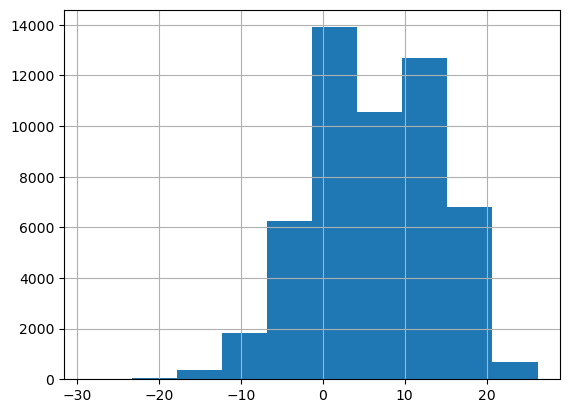

In [17]:
# display a histogram of TG but with new column having cleaned data (basically same as above)
df['TG_Celsius'].hist()

<Axes: xlabel='    DATE'>

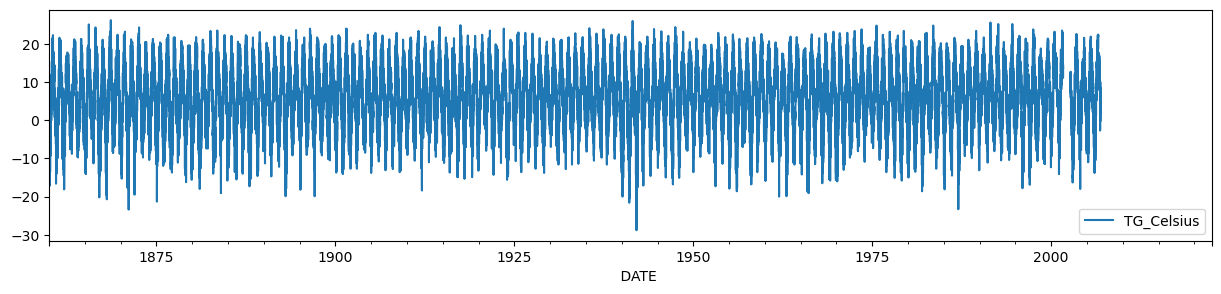

In [18]:
# Plot the temperature data
# '    DATE' is used as the x-axis (horizontal axis) representing the dates
# 'TG_Celsius' is used as the y-axis (vertical axis) representing the temperature values in degrees Celsius
# figsize=(15,3) specifies the size of the figure (width=15 inches, height=3 inches)
df.plot(x='    DATE', y='TG_Celsius', figsize=(15,3))

<Axes: xlabel='    DATE'>

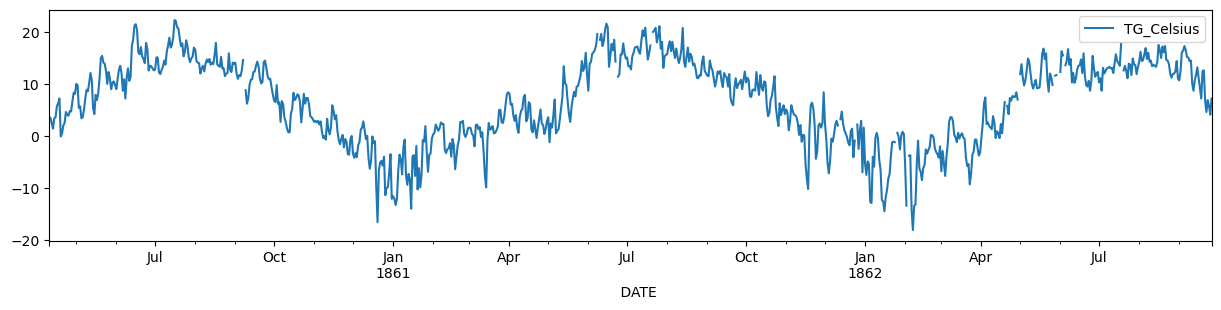

In [19]:
# Plot a subset of the DataFrame, selecting rows from index 100 to index 999 (inclusive)
# df[100:1000] selects rows with index values from 100 to 999 (inclusive)
# plot() is a convenience method in pandas that creates a plot of the selected data
# x='    DATE' specifies the 'DATE' column as the x-axis values for the plot
# y='TG_Celsius' specifies the 'TG_Celsius' column as the y-axis values for the plot
# figsize=(15,3) sets the size of the plot to 15 inches wide and 3 inches tall
df[100:1000].plot(x='    DATE', y='TG_Celsius', figsize=(15,3))